## Step 1

Let us first download five stocks for which we find plenty of news reports, analyst ratings and headlines.

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy.optimize import minimize
np.set_printoptions(suppress=True, precision=10)

the stocks chosen for this stock market are some big Indian companies and conglomerates: Tata Consultancy Services(TCS), Reliance Industries Limited(RIL), Maruti Suzuki Limited, Axis Bank, ITC.They represent the Technology, Chemical Industries and Fuel Refineries, Automobiles, Banking and FMCG sectors in that order.

Let us now download data regarding prices so that we have at least a 100 points regarding daily returns.

In [87]:
tickers = ['TCS.NS', 'RELIANCE.NS', 'MARUTI.NS','AXISBANK.NS', 'ITC.NS']
data = yf.download(tickers, start="2023-09-30", end="2024-05-01")["Close"]

[*********************100%***********************]  5 of 5 completed


In [89]:
data

Ticker,AXISBANK.NS,ITC.NS,MARUTI.NS,RELIANCE.NS,TCS.NS
Date,,,,,
2023-10-03,1040.247192,419.215027,10250.084961,1159.074951,3392.922363
2023-10-04,994.782227,415.735443,10035.064453,1157.074951,3415.999512
2023-10-05,1002.476318,415.687775,10114.614258,1157.050049,3465.824219
2023-10-06,1000.178101,421.502930,10205.653320,1159.000000,3496.770996
2023-10-09,995.481750,419.882324,10148.939453,1149.125000,3513.137939
...,...,...,...,...,...
2024-04-24,1062.430054,414.876678,12822.932617,1450.175049,3725.963135
2024-04-25,1126.130859,423.243866,12801.584961,1459.974976,3746.532959
2024-04-26,1129.428345,425.613770,12584.484375,1452.550049,3716.529297


I have downloaded the closing prices for all five stocks listed above. Now, I will calculate daily returns for all these stocks in percentage terms, and we will have 139 data points.

In [92]:
daily_returns = data.pct_change().dropna()*100

In [94]:
daily_returns

Ticker,AXISBANK.NS,ITC.NS,MARUTI.NS,RELIANCE.NS,TCS.NS
Date,,,,,
2023-10-04,-4.370593,-0.830024,-2.097744,-0.172551,0.680156
2023-10-05,0.773445,-0.011466,0.792718,-0.002152,1.458569
2023-10-06,-0.229254,1.398924,0.900074,0.168528,0.892912
2023-10-09,-0.469551,-0.384483,-0.555710,-0.852028,0.468059
2023-10-10,1.606017,0.896800,1.270886,0.441636,-0.259746
...,...,...,...,...,...
2024-04-24,0.710400,-0.069905,-0.401657,-0.626996,-1.126525
2024-04-25,5.995765,2.016789,-0.166480,0.675775,0.552067
2024-04-26,0.292815,0.559938,-1.695888,-0.508565,-0.800838


Let us compute the total returns that these stocks have provided in this six-month period under consideration.

In [97]:
total_returns = data.pct_change(139).dropna()*100
total_returns

Ticker,AXISBANK.NS,ITC.NS,MARUTI.NS,RELIANCE.NS,TCS.NS
Date,,,,,
2024-04-30,11.992706,0.522631,23.877679,26.566448,9.51763


Reliance gave the most returns in this period, and ITC the least returns.

Let us now compute the correlation matrix of daily returns

In [101]:
daily_returns.cov()

Ticker,AXISBANK.NS,ITC.NS,MARUTI.NS,RELIANCE.NS,TCS.NS
Ticker,,,,,
AXISBANK.NS,2.280340,0.586847,0.416883,0.563410,0.083566
ITC.NS,0.586847,1.285421,0.296681,0.226361,0.120154
MARUTI.NS,0.416883,0.296681,1.631714,0.474462,0.122676
RELIANCE.NS,0.563410,0.226361,0.474462,1.481024,0.317990
TCS.NS,0.083566,0.120154,0.122676,0.317990,1.733348


Let us visualize the same using heatmaps.

<Axes: xlabel='Ticker', ylabel='Ticker'>

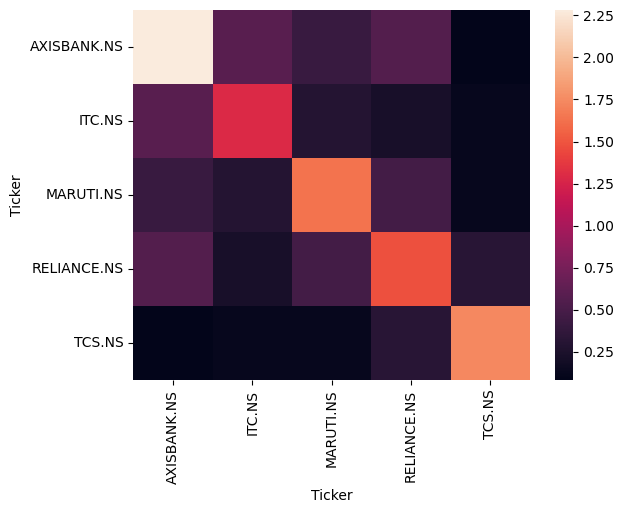

In [104]:
sns.heatmap(daily_returns.cov())

To get the better sense of how these stock prices are correlated, let us compute the correlation matrix now.

In [107]:
daily_returns.corr()

Ticker,AXISBANK.NS,ITC.NS,MARUTI.NS,RELIANCE.NS,TCS.NS
Ticker,,,,,
AXISBANK.NS,1.000000,0.342770,0.216119,0.306580,0.042032
ITC.NS,0.342770,1.000000,0.204855,0.164058,0.080496
MARUTI.NS,0.216119,0.204855,1.000000,0.305210,0.072945
RELIANCE.NS,0.306580,0.164058,0.305210,1.000000,0.198468
TCS.NS,0.042032,0.080496,0.072945,0.198468,1.000000


<Axes: xlabel='Ticker', ylabel='Ticker'>

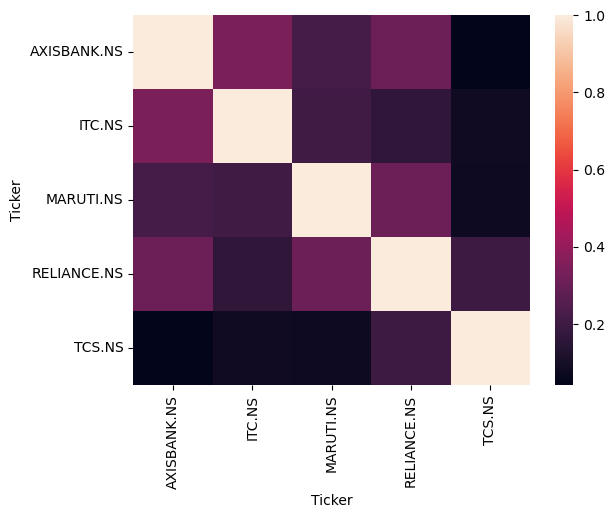

In [109]:
sns.heatmap(daily_returns.corr())

## Step 2

Let us now run a classic Markowitz Mean-Variance Optimization on this data for the five stock returns. 

In [113]:
#Calculating mean returns
mean_returns = daily_returns.mean()
mean_returns

Ticker
AXISBANK.NS    0.092804
ITC.NS         0.010112
MARUTI.NS      0.162216
RELIANCE.NS    0.176912
TCS.NS         0.073985
dtype: float64

In [117]:
#Calculating the covariance matrix again
cov_matrix = daily_returns.cov()
cov_matrix

Ticker,AXISBANK.NS,ITC.NS,MARUTI.NS,RELIANCE.NS,TCS.NS
Ticker,,,,,
AXISBANK.NS,2.280340,0.586847,0.416883,0.563410,0.083566
ITC.NS,0.586847,1.285421,0.296681,0.226361,0.120154
MARUTI.NS,0.416883,0.296681,1.631714,0.474462,0.122676
RELIANCE.NS,0.563410,0.226361,0.474462,1.481024,0.317990
TCS.NS,0.083566,0.120154,0.122676,0.317990,1.733348


Let us now start the optimization process. Our objective here is to find the best combination of stock allocations that maximize the Sharpe ratio.

In [122]:
def portfolio_stats(weights, mean_returns, cov_matrix):
    #Portfolio return
    portfolio_return = np.sum(weights * mean_returns)
    #Portfolio volatility (standard deviation)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility, -(portfolio_return/portfolio_volatility) #the last value is the negative of the Sharpe ratio, which is to be minimised

In [128]:
def obj_function(weights, mean_returns, cov_matrix):
    return portfolio_stats(weights, mean_returns, cov_matrix)[2] #returns the negative of the Sharpe ratio

In [130]:
def constraint(weights): #sum of weights of must be 1
    return np.sum(weights) - 1

In [132]:
# Bounds for weights: Between 0 and 1 to allow as no short-selling is allowed
bounds = [(0, 1) for _ in range(len(tickers))]

In [134]:
# Initial guess for weights is equal weights for all stocks
initial_guess = [1 / len(tickers)] * len(tickers)

In [136]:
initial_guess

[0.2, 0.2, 0.2, 0.2, 0.2]

In [138]:
# Constraints
constraints = ({'type': 'eq', 'fun': constraint})

In [140]:
opt_results = minimize(obj_function, initial_guess, args=(mean_returns, cov_matrix),
                       method='SLSQP', bounds=bounds, constraints=constraints) #Sequential Least Squares Programming

In [142]:
optimal_weights = opt_results.x
optimal_return, optimal_volatility = portfolio_stats(optimal_weights, mean_returns, cov_matrix)[0:2]

let us now look at the results of the optimization.

In [145]:
opt_results

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.1715232877024284
       x: [ 2.555e-02  1.174e-17  3.771e-01  4.862e-01  1.112e-01]
     nit: 8
     jac: [-7.592e-06  3.966e-02  2.756e-04 -6.887e-05 -6.411e-04]
    nfev: 49
    njev: 8

In [189]:
optimal_weights #Fractional terms

array([0.0255494792, 0.          , 0.3770543043, 0.4862398789,
       0.1111563376])

Let us see this graphically

Text(0.5, 1.0, 'Portfolio Weights After Optimization in Percentages')

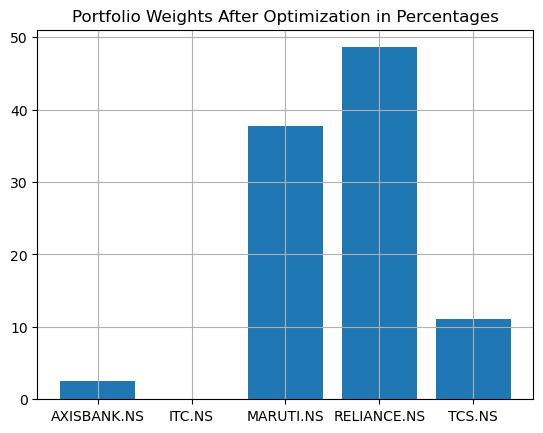

In [192]:
plt.bar(height=optimal_weights*100, x=daily_returns.columns)
plt.grid()
plt.title("Portfolio Weights After Optimization in Percentages")

## Step 3